c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
21:00:09 - cmdstanpy - INFO - Chain [1] start processing
21:00:12 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1200x600 with 0 Axes>

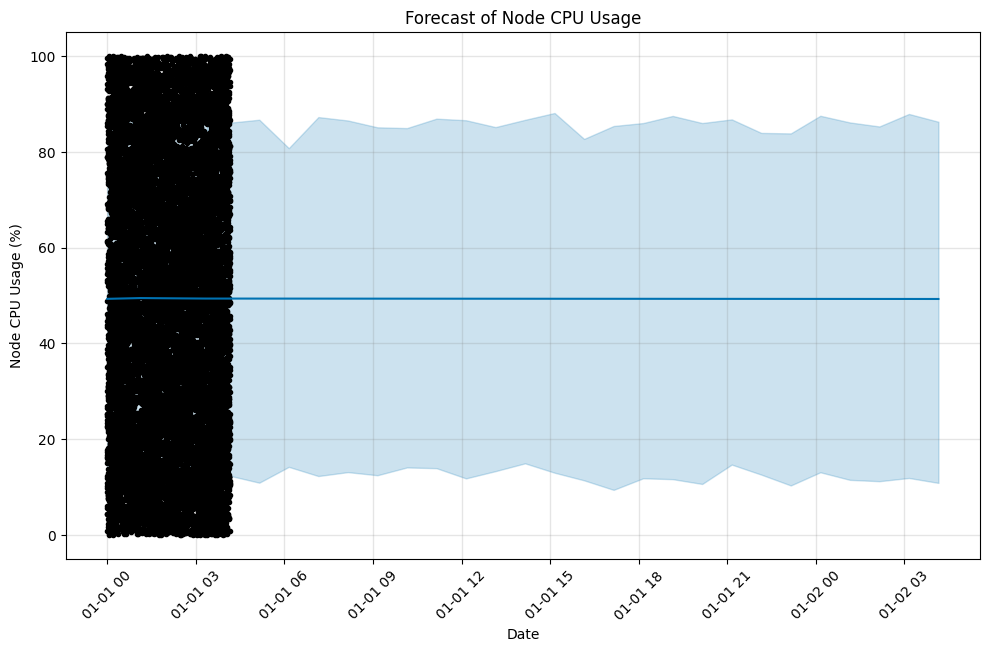

                     ds       yhat  yhat_lower  yhat_upper
250 2023-01-01 05:09:00  49.352709   10.913782   86.699303
251 2023-01-01 06:09:00  49.349195   14.216186   80.765212
252 2023-01-01 07:09:00  49.345682   12.303605   87.250588
253 2023-01-01 08:09:00  49.342169   13.120544   86.538087
254 2023-01-01 09:09:00  49.338655   12.468471   85.112418
255 2023-01-01 10:09:00  49.335142   14.096379   84.949100
256 2023-01-01 11:09:00  49.331628   13.945532   86.920009
257 2023-01-01 12:09:00  49.328115   11.811511   86.590502
258 2023-01-01 13:09:00  49.324602   13.326808   85.158901
259 2023-01-01 14:09:00  49.321088   14.955050   86.676422
260 2023-01-01 15:09:00  49.317575   12.996618   88.103225
261 2023-01-01 16:09:00  49.314062   11.404085   82.691304
262 2023-01-01 17:09:00  49.310548    9.415522   85.388482
263 2023-01-01 18:09:00  49.307035   11.833649   86.001659
264 2023-01-01 19:09:00  49.303521   11.650246   87.489530
265 2023-01-01 20:09:00  49.300008   10.649257   86.0066

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load dataset (use latin1 encoding to handle any special characters)
data = pd.read_csv("kubernetes_performance_metrics_dataset.csv", encoding='latin1')

# Ensure 'timestamp' column is in datetime format
data["timestamp"] = pd.to_datetime(data["timestamp"])

# Handle missing values if needed (you can fill or drop depending on your needs)
data.fillna(0, inplace=True)

# You can choose any of the metrics to predict. Let's say we are predicting 'node_cpu_usage'
data["ds"] = data["timestamp"]
data["y"] = data["node_cpu_usage"]  # Replace with the metric you want to forecast, e.g., node_cpu_usage

# Prepare Data for Prophet
df_train = data[["ds", "y"]]

# Initialize and fit Prophet model
model = Prophet()
model.fit(df_train)

# Create future dataframe for prediction (forecast for the next 24 hours)
future = model.make_future_dataframe(periods=24, freq='H')  # Forecasting the next 24 hours with hourly frequency
prediction = model.predict(future)

# Plot the forecasted results
plt.figure(figsize=(12, 6))
model.plot(prediction)
plt.title("Forecast of Node CPU Usage")
plt.xlabel("Date")
plt.ylabel("Node CPU Usage (%)")
plt.xticks(rotation=45)
plt.show()

# Output the predictions
print(prediction[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(24))